##### Name: Soumya Panja
##### Roll no.: 34230820017
##### Department: CSE(AI & ML)
##### Paper Name: Introduction to Machine Learning Lab
##### Paper Code: PCCAIML 592

In [1]:
import numpy as np
from numpy import log, dot, e, shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_features = 4, n_classes = 2)

In [3]:
class LogisticRegression:
    def sigmoid(self, z):
        sig = 1/(1+e**-z)
        return sig
  
    def initialize(self, X):
        weights = np.zeros((shape(X)[1]+1, 1))
        X = np.c_[np.ones((shape(X)[0], 1)), X]
        return weights, X

    def fit(self, X, y, alpha = 0.001, iter = 400):
        weights, X = self.initialize(X)

        def cost(theta):
            z = dot(X, theta)
            h = self.sigmoid(z)
            cost0 = y.T.dot(log(h))
            cost1 = (1 - y).T.dot(log(1-h))
            cost = -((cost1 + cost0))/len(y)
            return cost

        cost_list = np.zeros(iter,)

        for i in range(iter):
            weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    
    def predict(self, X):
        z = dot(self.initialize(X)[1], self.weights)
        lis = []
        for i in self.sigmoid(z):
            if(i > 0.5):
                lis.append(1)
            else:
                lis.append(0)
        
        return lis

In [4]:
def standardize(X_tr):
    mu = np.mean(X_tr, axis = 0)
    std = np.std(X_tr, axis = 0)
    X_tr = (X_tr - mu)/std
    return X_tr

In [5]:
def F1_score(y, y_hat):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp + fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [6]:
f1_score_tr_list = []
f1_score_te_list = []
for i in range(600):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.1)
    X_tr = standardize(X_tr)
    X_te = standardize(X_te)
    reg = LogisticRegression()
    model = reg.fit(X_tr, y_tr)
    y_pred_test_data = reg.predict(X_te)
    y_pred_train_data = reg.predict(X_tr)
    f1_score_tr = F1_score(y_tr, y_pred_train_data)
    f1_score_te = F1_score(y_te, y_pred_test_data)
    f1_score_tr_list.append(f1_score_tr)
    f1_score_te_list.append(f1_score_te)

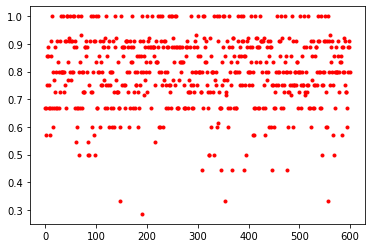

In [7]:
plt.plot(np.arange(len(f1_score_te_list)), f1_score_te_list, '.r')

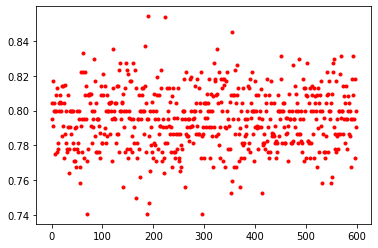

In [8]:
plt.plot(np.arange(len(f1_score_tr_list)), f1_score_tr_list, ".r")

In [9]:
print("Average Score for test data:", np.mean(f1_score_te_list))
print("Average Score for train data:", np.mean(f1_score_tr_list))

Average Score for test data: 0.7966208328708329
Average Score for train data: 0.7952093996486943


In [10]:
print("Test f1 score sd:", np.std(f1_score_te_list))
print("Train f1 score sd:", np.std(f1_score_tr_list))

Test f1 score sd: 0.12767864825278163
Train f1 score sd: 0.017037775103342062


In [11]:
print("Test f1 score Max:", np.max(f1_score_te_list))
print("Test f1 score Min:", np.min(f1_score_te_list))

Test f1 score Max: 1.0
Test f1 score Min: 0.28571428571428575


In [12]:
print("Train f1 score Max:", np.max(f1_score_tr_list))
print("Train f1 score Min:", np.min(f1_score_tr_list))

Train f1 score Max: 0.8541666666666666
Train f1 score Min: 0.7407407407407408
